# 27. Correlation and Regression

In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

I keep some data frames in CSV format accessible from my website. One of them is called personality.csv and has, as you might imagine, personality variables. In this case, we are using the `neuroanx` subset which compares [neuroticism](https://www.webmd.com/mental-health/neurotic-behavior-overview), anxiety and several related variables:

G21
: Y/N response to "are you 21 years old or older?"

SitClass
: Front/middle/back response to "where do you prefer to sit in class?"

Friends
: Same/opposite/no difference response to "which sex do you find it easiest to make friends with."

TxRel
: Toxic relationships beliefs, higher scores indicate more toxicity.

Opt
: Optimism, higher scores indicate more optimism

SE
: Self-esteem, higher score indicate higher levels of self-esteem

## Correlation

When two numeric variables are associated, we say they are correlated. However, just as association does not imply causation, neither does correlation. 

We have three valuable functions that we can use to investigate the linear correlation of two variables. Similar to A/B testing, we can randomly shuffle the $y$-variable to test whether the correlation between $x$ and $y$ is significant.

1. `reg_r`
2. `reg_stat`
3. `reg_shuffle`

The input for all three functions is a two-column table with two numeric variables, the $x$-variable in the first column and $y$-variable in the second.

The `reg_r` function returns the correlation of two variables and requires the `z_scores` function to run properly. The `reg_stat` function produces regression statistics and a scatter plot. The `reg_shuffle` functions like the `ab_shuffle` function and allows us to simulate the null hypothesis in a test of significant correlation.

In [4]:
def reg_r (tab):
    x = tab.column(0)
    y = tab.column(1)
    return sum(z_scores(x)*z_scores(y))/(tab.num_rows - 1)

In [5]:
def z_scores(array):
    mean = np.mean(array)
    sd = np.std(array)
    return (array - mean) / sd

In [6]:
def reg_stat (tab):
    x = tab.column(0)
    y = tab.column(1)
    r = sum(z_scores(x)*z_scores(y))/(tab.num_rows - 1)
    b = r * np.std(y) / np.std(x)
    a = np.mean(y) - b * np.mean(x)
    print('The correlation is ', r)
    print('The line of best fit is y =',round(a,4), '+',round(b,4),'x')
    tab.scatter(0,1, fit_line = True)

In [7]:
def reg_shuffle(tab):
    shuffled_y = tab.sample(with_replacement = False).column(1)
    shuffled_tab = tab.with_column("Shuffled Y",shuffled_y).select(0,2)
    return shuffled_tab

In [19]:
def reg_hist(myArray, observed_value):
    tab = Table().with_column('Simulated Correlation',myArray)
    tab.hist(0)
    _ = plots.plot([observed_value, observed_value], [0, 1], color='red', lw=2)

## Data for examples

In [20]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/neuroanx.csv')
pers.show(5)

Sex,G21,SitClass,Friends,TxRel,Anx,Opt,SE,Neuro
M,N,F,O,26,23,20,70,10
F,N,M,S,21,24,22,68,11
M,Y,F,E,25,27,29,65,11
M,Y,B,E,22,30,28,61,15
M,N,M,E,23,40,26,64,16


In [21]:
neuroanx = pers.select('Neuro','Anx')
neuroanx.show(5)

Neuro,Anx
10,23
11,24
11,27
15,30
16,40


## Example 1: Neuroticism vs. Anxiety

Let's first check the association between the variables and set the correlation to `obs_r`

In [22]:
obs_cor = reg_r(neuroanx)
obs_cor

0.7140323446533897

The correlation is  0.7140323446533897
The line of best fit is y = 16.8451 + 0.4833 x


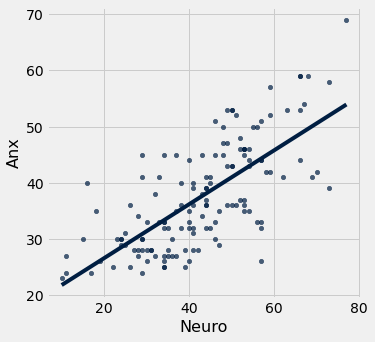

In [23]:
reg_stat(neuroanx)

We can test the null hypothesis that there is zero correlation and determine the probability of seeing this pattern in the results by random chance. To determine a single value of this statistic, we find the correlation of the two variables after a random reshuffling of the $y$-variable.

In [24]:
new_cor = reg_r(reg_shuffle(neuroanx))
new_cor

-0.059281037495256206

In [25]:
shuff_cor = make_array()

reps = 1000

for i in range(reps):
    new_cor = reg_r(reg_shuffle(neuroanx))
    shuff_cor = np.append(shuff_cor, new_cor)
# Remove hashtag comment to see the shuff_cor results array    
# shuff_cor

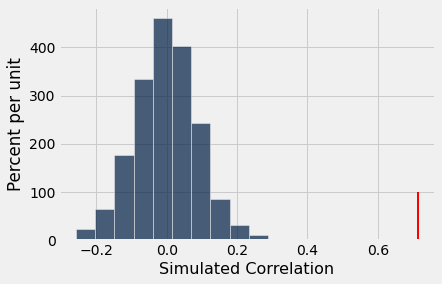

In [26]:
reg_hist(shuff_cor, obs_cor)

In [27]:
p_value = sum( shuff_cor >= obs_cor ) / reps
p_value

0.0

In [28]:
# Test for a significant correlation between
# Neuroticism and Toxic Relationship Beliefs (TxRel).

...

Ellipsis